# Comparing Different Types of Cells

In this section we will discuss how to interact with different types of cells and take a look at how we can, analyze, draw connections, and plot differences between our cell types. We will be covering Humans vs Mice, how to utilize the Allens data of Cre lines, looking at diferences between differing dendrite types, and learn how to inspect the different layers of cortex. 

## Humans vs Mice

In [1]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

### Get Cells & Manipulate Dataframe

As stated in previous sections, the `get_cells` method downloads metadata for all cells in the database. By selecting a species within the method, `get_cells` will only retrieve the data from the species of interest. We will be working first with data on human cells.
Look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information on the `get_cells` method.

In [2]:
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
print(human_cells)

[{'reporter_status': None, 'cell_soma_location': [273.0, 354.0, 216.0], 'species': 'Homo Sapiens', 'id': 525011903, 'name': 'H16.03.003.01.14.02', 'structure_layer_name': '3', 'structure_area_id': 12113, 'structure_area_abbrev': 'FroL', 'transgenic_line': '', 'dendrite_type': 'spiny', 'apical': 'intact', 'reconstruction_type': None, 'disease_state': 'epilepsy', 'donor_id': 524848408, 'structure_hemisphere': 'right', 'normalized_depth': None}, {'reporter_status': None, 'cell_soma_location': [69.0, 254.0, 96.0], 'species': 'Homo Sapiens', 'id': 528642047, 'name': 'H16.06.009.01.02.06.05', 'structure_layer_name': '5', 'structure_area_id': 12141, 'structure_area_abbrev': 'MTG', 'transgenic_line': '', 'dendrite_type': 'aspiny', 'apical': 'NA', 'reconstruction_type': None, 'disease_state': 'epilepsy', 'donor_id': 528574320, 'structure_hemisphere': 'left', 'normalized_depth': None}, {'reporter_status': None, 'cell_soma_location': [322.0, 255.0, 92.0], 'species': 'Homo Sapiens', 'id': 53725631

As you can see, the output for the metadata of our cells is messy and difficutlt to visualize. To make our data easier to read and work with, we can convert `all_cells` into a Pandas datadrame.


Note: If you're having trouble with Pandas, it can help to look at <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/">the user guide</a>.

In [3]:
import pandas as pd 

# Create a dataframe from 'human_cells' and re-assign the dataframe to a new variable
human_cells_df = pd.DataFrame(human_cells)

# '.head()'returns the first 5 rows of the dataframe 
human_cells_df.head()

,reporter_status,cell_soma_location,species,id,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
0,None,"[273.0, 354.0, 216.0]",Homo Sapiens,525011903,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
1,None,"[69.0, 254.0, 96.0]",Homo Sapiens,528642047,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
2,None,"[322.0, 255.0, 92.0]",Homo Sapiens,537256313,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
3,None,"[79.0, 273.0, 91.0]",Homo Sapiens,519832676,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
4,None,"[66.0, 220.0, 105.0]",Homo Sapiens,596020931,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825


If we look back at our dataframe, our rows don't have any useful information -- they're simply a list of indices starting from zero. We can reassign the row values by using the method `set_index`. You can assign any present column in the dataframe as the indices to be the indeces for the rows. Since each observation in the dataframe has a unique `id`, the `id` will be set as the index.

In [4]:
human_cells_df = human_cells_df.set_index('id')
human_cells_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825


The dataset also includes metadata on mouse cells, so we will demonstrate how to pull the mouse metadata, convert the data into a pandas dataframe, and re-assign the row index all in the same line.

In [5]:
mouse_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.MOUSE])).set_index('id')
mouse_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,dendrite-only,,485250100,right,0.478344
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,dendrite-only,,322489588,left,0.608590


Let's get some information about our cells. We can use `len()` on a dataframe to get the number of rows. Alternatively, we can use the `count()` method on our dataframe to get the number of values each column contains. The number of rows is equivalent to the number of observations (i.e. length of the dataframe). 

In [6]:
print(human_cells_df.count())
n_human_cells = len(human_cells_df)
print('\nLength of dataframe:')
print(n_human_cells)

reporter_status            0
cell_soma_location       413
species                  413
name                     413
structure_layer_name     413
structure_area_id        413
structure_area_abbrev    413
transgenic_line          413
dendrite_type            413
apical                   413
reconstruction_type      158
disease_state            413
donor_id                 413
structure_hemisphere     413
normalized_depth         162
dtype: int64

Length of dataframe:
413


In [7]:
print(mouse_df.count())
n_mouse_cells = len(mouse_df)
print('\nLength of dataframe:')
print(n_mouse_cells)

reporter_status          1920
cell_soma_location       1920
species                  1920
name                     1920
structure_layer_name     1920
structure_area_id        1920
structure_area_abbrev    1920
transgenic_line          1920
dendrite_type            1920
apical                   1920
reconstruction_type       509
disease_state            1920
donor_id                 1920
structure_hemisphere     1920
normalized_depth         1297
dtype: int64

Length of dataframe:
1920


After executing the method on both `mouse_cells_df` and `human_cells_df`, you can see that there are more observations for mice than humans in the data.

Now that we have dataframes for both human and mouse cells, we can compare their electrophysiological properties and plot some graphs for data visualization. Lets start by comparing the resting membrane potential of human cells vs mouse cells using a boxplot. 

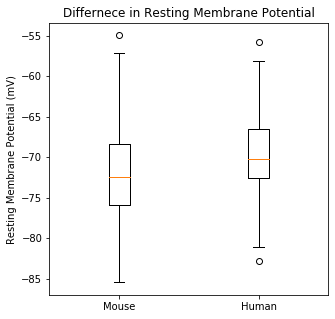

In [8]:
import matplotlib.pyplot as plt # Import our plotting package from matplotlib
%matplotlib inline 

# set up our figure
plt.figure(figsize = (5,5))

# collect the electrophysiology data
ephys_features = ctc.get_ephys_features()
ephys_df = pd.DataFrame(ephys_features).set_index('specimen_id')

# combine the metadata with our electrophysiology data
mouse_ephys_df = mouse_df.join(ephys_df)
human_ephys_df = human_cells_df.join(ephys_df)

data = ([mouse_ephys_df['vrest'], human_ephys_df['vrest']])

plt.boxplot(data)
plt.ylabel('Resting Membrane Potential (mV)')
plt.xticks([1,2],['Mouse', 'Human'])
plt.title('Differnece in Resting Membrane Potential')
plt.show()

As you can see, the median and distribution of resting membrane potential between mouse cells and human cells is similar. This is good to know cosidering that mice are frequently used to conduct experiments to research human physiology. 

## Two Different Cre-Lines 

What if we want to know whether different genetically-identified cells have different intrinsic physiology? The Allen Institute for Brain Science uses transgenic mouse lines that have Cre-expressing cells to mark specific types of cells in the brain. Lets find out what cre-lines are availabe in our mouse data under the column `transgenic_line`. 

We can take a look at how many different values are stored within a column using the `.unique()` method.

In [9]:
mouse_ephys_df['transgenic_line'].unique()

array(['Oxtr-T2A-Cre', 'Pvalb-IRES-Cre',
       'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre', 'Cux2-CreERT2',
       'Scnn1a-Tg3-Cre', 'Htr3a-Cre_NO152', 'Rorb-IRES2-Cre',
       'Ctgf-T2A-dgCre', 'Nkx2-1-CreERT2', 'Vip-IRES-Cre',
       'Chrna2-Cre_OE25', 'Nos1-CreERT2|Sst-IRES-FlpO', 'Scnn1a-Tg2-Cre',
       'Nos1-CreERT2', 'Ntsr1-Cre_GN220', 'Esr2-IRES2-Cre',
       'Tlx3-Cre_PL56', 'Vipr2-IRES2-Cre',
       'Chrna2-Cre_OE25|Pvalb-T2A-Dre', 'Nr5a1-Cre', 'Ndnf-IRES2-dgCre',
       'Sst-IRES-Cre', 'Gad2-IRES-Cre', 'Chat-IRES-Cre-neo',
       'Slc17a6-IRES-Cre', 'Sim1-Cre_KJ18', 'Glt25d2-Cre_NF107',
       'Rbp4-Cre_KL100', 'Penk-IRES2-Cre-neo',
       'Htr3a-Cre_NO152|Pvalb-T2A-Dre', 'Esr2-IRES2-Cre|PhiC31-neo',
       'Gng7-Cre_KH71', 'Pvalb-T2A-FlpO|Vipr2-IRES2-Cre',
       'Pvalb-T2A-CreERT2', 'Esr2-IRES2-Cre-neo|PhiC31-neo',
       'Esr2-IRES2-Cre-neo', 'Vipr2-IRES2-Cre-neo'], dtype=object)

Next, lets select two different Cre lines from the dataset and create dataframes that only contain cells from those Cre lines. For more information on the Allen Cell Types Cre lines, please visit <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html">the Allen Cell Types Cre Lines Glossary</a> for a short description of the cortical expression patterns of the transgenic Cre lines available in the Allen Cell Types dataset.

**Note**: Be sure that you are using the entire name of the Cre line -- that means everything within the single quotes above.

In [10]:
# choose your Cre lines of interest 
cre_line_1 = 'Oxtr-T2A-Cre'
cre_line_2 = 'Pvalb-IRES-Cre'

# creates dataframes from the selected Cre lines above
cre_line_1_df = mouse_ephys_df[mouse_ephys_df['transgenic_line']==cre_line_1]
cre_line_2_df = mouse_ephys_df[mouse_ephys_df['transgenic_line']==cre_line_2]

# get the length of each dataframe
print(cre_line_1 + ' has ' + str(len(cre_line_1_df)) + ' cells')
print(cre_line_2 + ' has ' + str(len(cre_line_2_df)) + ' cells')



Oxtr-T2A-Cre has 46 cells
Pvalb-IRES-Cre has 217 cells


Now that we have two Cre lines to compare, we can begin to plot their physiology and check for differneces. Let's start by plotting a distribution of the recorded resting membrane potential (vrest) for our two different Cre lines.

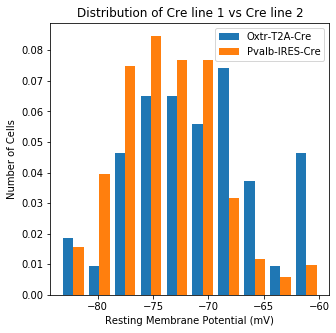

In [11]:
import matplotlib.pyplot as plt # Import our plotting package from matplotlib
%matplotlib inline 

plt.figure(figsize=(5,5)) # Modify this line to change the dimensions of your plot

# Change your parameter below.
# Make sure this matches the name in the parentheses in the orange box below.
parameter = 'vrest'

# Plot the histogram, with density = True 
plt.hist([cre_line_1_df[parameter],cre_line_2_df[parameter]],density = True)
plt.xlabel('Resting Membrane Potential (mV)') # X label -- be sure to update!
plt.ylabel('Number of Cells')
plt.legend([cre_line_1,cre_line_2])

plt.title('Distribution of Cre line 1 vs Cre line 2') # Plot title -- be sure to update!
plt.show()

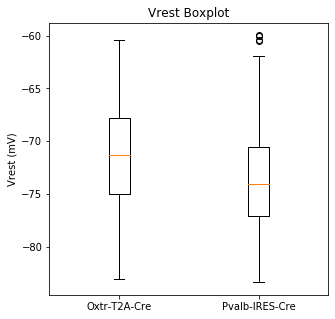

In [12]:
plt.figure(figsize=(5,5)) # Modify this line to change the dimensions of your plot

# Change your parameter below.
# Make sure this matches the name in the parentheses in the orange box below.
parameter = 'vrest'

plt.boxplot([cre_line_1_df[parameter],cre_line_2_df[parameter]])
plt.ylabel('Vrest (mV)') # y-axis label
plt.xticks([1, 2], [cre_line_1,cre_line_2])

plt.title('Vrest Boxplot') # Plot title 
plt.show()

For more information on `matplotlib.pyplot` and the functions that come with it, please visit <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html">here</a>.

## Spiny vs Aspiny 

It would help to know what information is in our dataset. In other words, what are the columns that make up our dataframe? We can get a list containing all the columns by accessing the attribute `.columns`. Here, we will be working with the ***human_cells_df*** dataframe and assign the output of this method to `human_df_columns`.

In [13]:
human_df_columns = human_cells_df.columns
print(human_df_columns)

Index(['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere',
       'normalized_depth'],
      dtype='object')


We can access individual columns with the notation `dataframe['column of interest']`. This will index into the dataframe and return each row's value that is stored within the column of interest. For example, lets take a look at `the denrite_type` column of our dataframe. 

In [14]:
human_cells_df['dendrite_type']

id
525011903     spiny
528642047    aspiny
537256313     spiny
519832676     spiny
596020931    aspiny
              ...  
545612828     spiny
527952884     spiny
488701127     spiny
561469082    aspiny
601958555     spiny
Name: dendrite_type, Length: 413, dtype: object

In [15]:
print(human_cells_df['dendrite_type'].unique())

['spiny' 'aspiny' 'sparsely spiny']


Like numpy arrays, we can use boolean indexing to filter our pandas dataframe. Our dataframe has data on two different dendrite types. Filter your dataframe by using the following syntax:
```
new_df = original_df[original_df['Column of Interest'] == 'Desired Value']
```
In plain english, what this is saying is: save a dataframe from the original dataframe, where the original dataframe values in my Column of Interest are equal to my Desired Value.


Below we will demonstrate this by creating a dataframe that only contains rows that have *spiny* in their `dendrite_type` column.

In [16]:
spiny_df = human_cells_df[human_cells_df['dendrite_type']=='spiny']
spiny_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
569095789,None,"[110.0, 122.0, 240.0]",Homo Sapiens,H17.06.004.11.05.04,2,12136,AnG,,spiny,intact,full,tumor,569008241,left,0.056400
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,None,epilepsy,545510854,right,NaN


Finally, we can do as we did above and plot some of the metrics for our different dendrite types. Lets first look at the frequency of each dendrite type. `value_counts()` is a method that will count up the number of instances of each value.
`plot()` is a Pandas method that will plot, depending on the `kind` argument you give it.

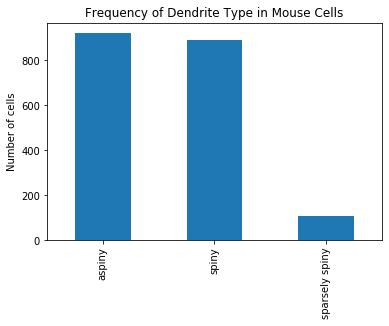

In [22]:
# For the different values in dendrite_type column, get the value_counts, and plot as a bar plot.
mouse_ephys_df['dendrite_type'].value_counts().plot(kind='bar')

# Add y label and title 
plt.ylabel('Number of cells')
plt.title('Frequency of Dendrite Type in Mouse Cells')

# Show the plot!
plt.show()

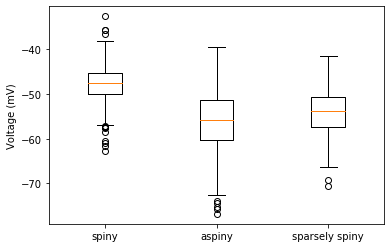

In [18]:
fig,ax = plt.subplots()

spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']=='spiny']
aspiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']=='aspiny']
sparsely_spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']=='sparsely spiny']

spiny_ft = spiny_df['fast_trough_v_long_square']
aspiny_ft = aspiny_df['fast_trough_v_long_square']
sparsely_spiny_ft = sparsely_spiny_df['fast_trough_v_long_square']

data = [spiny_ft,aspiny_ft,sparsely_spiny_ft]

ax.boxplot(data)
ax.set_xticklabels(['spiny','aspiny','sparsely spiny'])
ax.set_ylabel('Voltage (mV)')
plt.show()

## Layers of Cortex: Depth 

The Allen also contians information from what layer of cortex the cells in the dataset are harvested from. We can execute `.unique()` again to see what layers our mouse cells are coming from. Knowing what layers our cells are comung from allows us to determine if there are any strong differences in electrophysiological, morphological features between different layers. 

In [19]:
print(mouse_ephys_df['structure_layer_name'].unique())

['5' '4' '2/3' '6a' '6b' '1']


In [20]:
# set up the dataframes that only contain cells from our layers of interest 
mouse_VISp_df = mouse_ephys_df[mouse_ephys_df['structure_area_abbrev']=='VISp']

mouse_2_3_df = mouse_ephys_df[mouse_ephys_df['structure_layer_name']=='2/3']

mouse_5_df = mouse_ephys_df[mouse_ephys_df['structure_layer_name']=='5']


Once we have set up our dataframes, we are able to plot out some of the morphological and electrophysiological features and attempt to draw connections between the two layers. Below we will create boxplots that compares layers 2/3 and 5 with respect to the Rheobase, resting membrane potential, and membrane time constant.

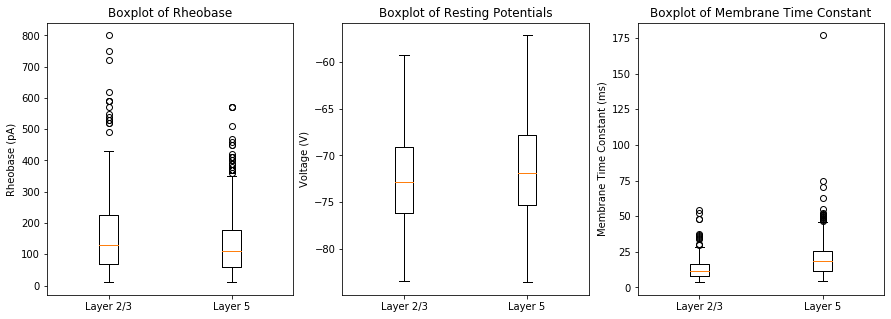

In [21]:
# creates a 1 by 3 figure for our boxplots 
fig, ax = plt.subplots(1,3, figsize = (15,5))

#on the first graph, plot the rheobase
threshold_i_long_square_mouse_2_3_ft = mouse_2_3_df['threshold_i_long_square']
threshold_i_long_square_mouse_5_ft = mouse_5_df['threshold_i_long_square']
threshold_i_long_square_data = [threshold_i_long_square_mouse_2_3_ft,
                                threshold_i_long_square_mouse_5_ft]

ax[0].boxplot(threshold_i_long_square_data)
ax[0].set_xticklabels(['Layer 2/3','Layer 5'])
ax[0].set_ylabel('Rheobase (pA)')
ax[0].set_title('Boxplot of Rheobase')

# On the second graph, create the box plot of resting potential
vrest_mouse_2_3_ft = mouse_2_3_df['vrest'].dropna()
vrest_mouse_5_ft = mouse_5_df['vrest'].dropna()

vrest_data = [vrest_mouse_2_3_ft,vrest_mouse_5_ft]

ax[1].boxplot(vrest_data)
ax[1].set_xticklabels(['Layer 2/3','Layer 5'])
ax[1].set_ylabel('Voltage (V)')
ax[1].set_title('Boxplot of Resting Potentials')


#On the third graph, create a box plot of Membrane Time Constant 

tau_mouse_2_3_ft = mouse_2_3_df['tau'].dropna()
tau_mouse_5_ft = mouse_5_df['tau'].dropna()

tau_data = [tau_mouse_2_3_ft,tau_mouse_5_ft]

ax[2].boxplot(tau_data)
ax[2].set_xticklabels(['Layer 2/3','Layer 5'])
ax[2].set_ylabel('Membrane Time Constant (ms)')
ax[2].set_title('Boxplot of Membrane Time Constant')

plt.show()